# Contour Generation

In [1]:
import cv2
import random
import sys
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
from imutils import perspective
from imutils import contours
import os
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import time

In [2]:
! git clone https://github.com/RobertSmithers/TeethSegmentation.git

Cloning into 'TeethSegmentation'...
remote: Enumerating objects: 849, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 849 (delta 14), reused 31 (delta 12), pack-reused 815
Receiving objects: 100% (849/849), 589.37 MiB | 36.45 MiB/s, done.
Resolving deltas: 100% (119/119), done.
Checking out files: 100% (375/375), done.


In [3]:
sys.path.append("/content/TeethSegmentation")

In [4]:
%cd '/content/TeethSegmentation/'

/content/TeethSegmentation


In [5]:
def erosion(path):
    dirs=os.listdir(path)
    l = []
    dirs.sort()
    for i in range (1,len(dirs)+1):
        img= path+str(i)+'.png'
        #img = '/content/TeethSegmentation/data/masked_img/' + str(random_number) + '.png'
        #print('Random Image = ' + str(random_number) + '.png')

        # Load in image, convert to gray scale, and Otsu's threshold
        kernel = (np.ones((3,3), dtype=np.float32))

        image = cv2.imread(img)
        #image = mpimg.imread(img)

        image=cv2.resize(image,(3130,1200))
        image=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        erosion = cv2.erode(thresh,kernel,iterations = 5)
        
        l.append(erosion)
    return l

In [6]:
masked_path = '/content/TeethSegmentation/data/masked_img/'

masked_erosion_img = erosion(masked_path)

# Test (with random number) To Ensure Erosion of Masked Img Worked

84


(-0.5, 3129.5, 1199.5, -0.5)

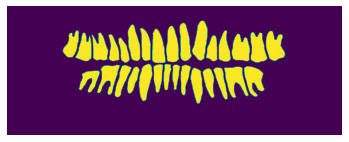

In [7]:
#Check
random_number=random.randint(1,116)
print(random_number)

#Shows predicted erosion on masked img of random_number
predict = masked_erosion_img[random_number-1]
plt.imshow(predict)
plt.axis('off')

#Example shows (random_number).png

# Contour Generation

In [8]:
def contour_generation():
  l = []
  for i in range(116):
    predict = masked_erosion_img[i]
    im_path = str(i+1)+'.png'
    plt.imsave(im_path, predict)
    path = '/content/TeethSegmentation/data/original_img/' + im_path
    img = cv2.imread(path)
    predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)
    mask=np.uint8(predict1*255)# 
    _, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
    cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 5)
    img = cv2.UMat.get(img)
    l.append(img)
  return l

In [9]:
contour = contour_generation()

# Test (with random number) To Ensure Contour Generation Works

70


(-0.5, 3103.5, 1199.5, -0.5)

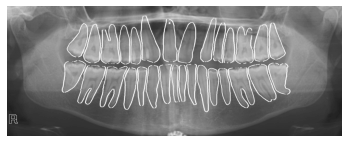

In [10]:
#Check
random_number=random.randint(1,116)
print(random_number)

#Shows contour img on x-ray image of random_number
plt.imshow(contour[random_number-1], cmap = 'gray')
plt.axis('off')

#Example shows (random_number).png

# Save Contour Images

In [ ]:
for i in range(len(contour)):
    im = Image.fromarray(contour[i])
    x = i + 1
    im.save(str(x)+'.png')

# Download Contour Images

In [ ]:
i = 1
while i < (len(contour)+1):
  files.download(str(i)+ '.png')
  i = i + 1
  time.sleep(60)

In [ ]:
#files.download(str(116)+ '.png')